In [1]:
import pandas as pd
import matplotlib.pylab as plt
import math

In [2]:
plt.rcParams['figure.dpi'] = 200

In [3]:
df = pd.read_csv("data/powerplants (global) - global_power_plants.csv", encoding = "ISO-8859-1", engine='python')

# General stats

In [7]:
df.shape

(34936, 15)

In [4]:
df_barplot = pd.DataFrame({'primary_fuel': df.primary_fuel.value_counts().index.tolist(),
                          'amount': df.primary_fuel.value_counts().values.tolist()})

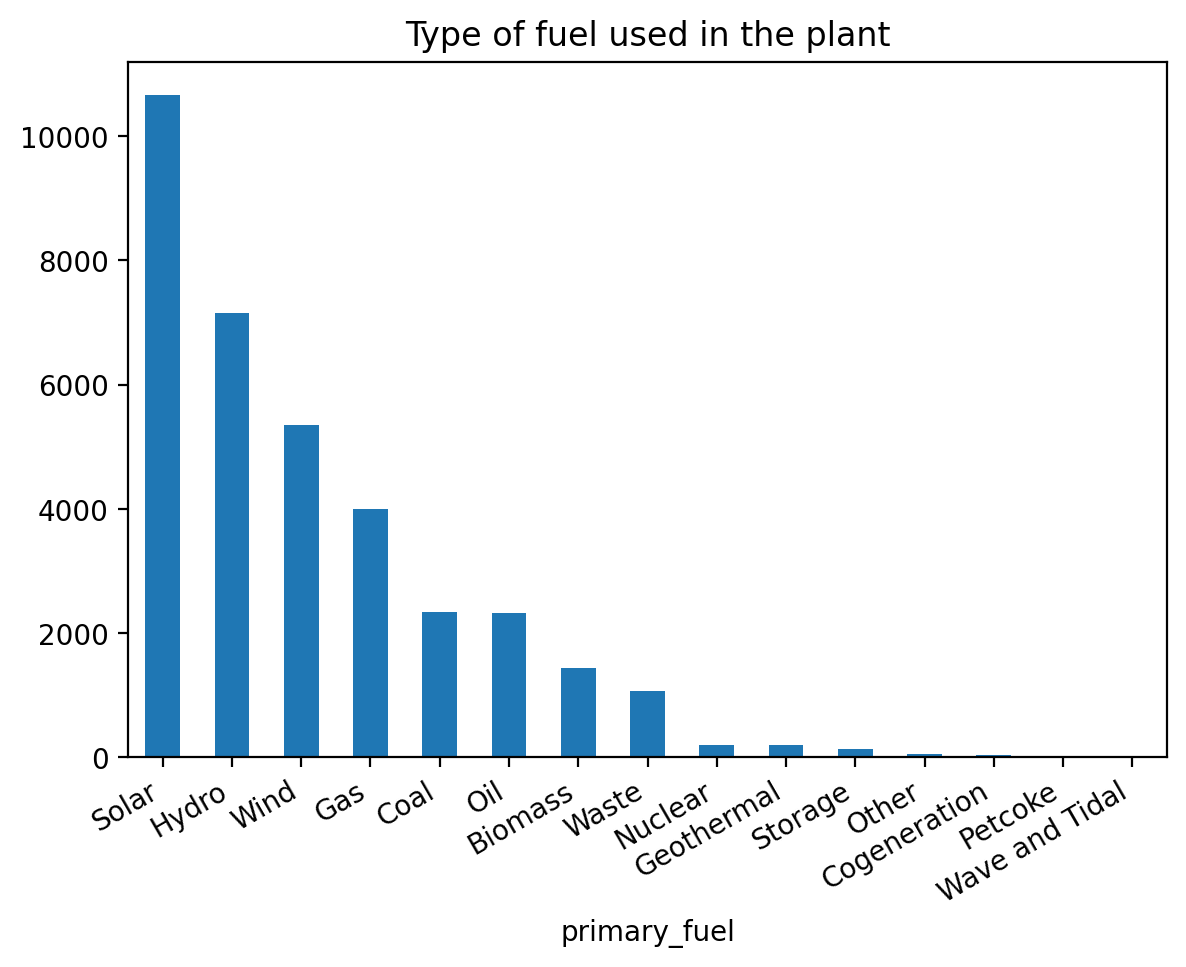

In [7]:
ax = df_barplot.plot(x='primary_fuel', y='amount', kind='bar', legend=False, rot=0)
plt.title("Type of fuel used in the plant")
plt.tight_layout()
plt.gcf().autofmt_xdate()
plt.show()

In [14]:
x_label_histograms = "Capacity in MW"

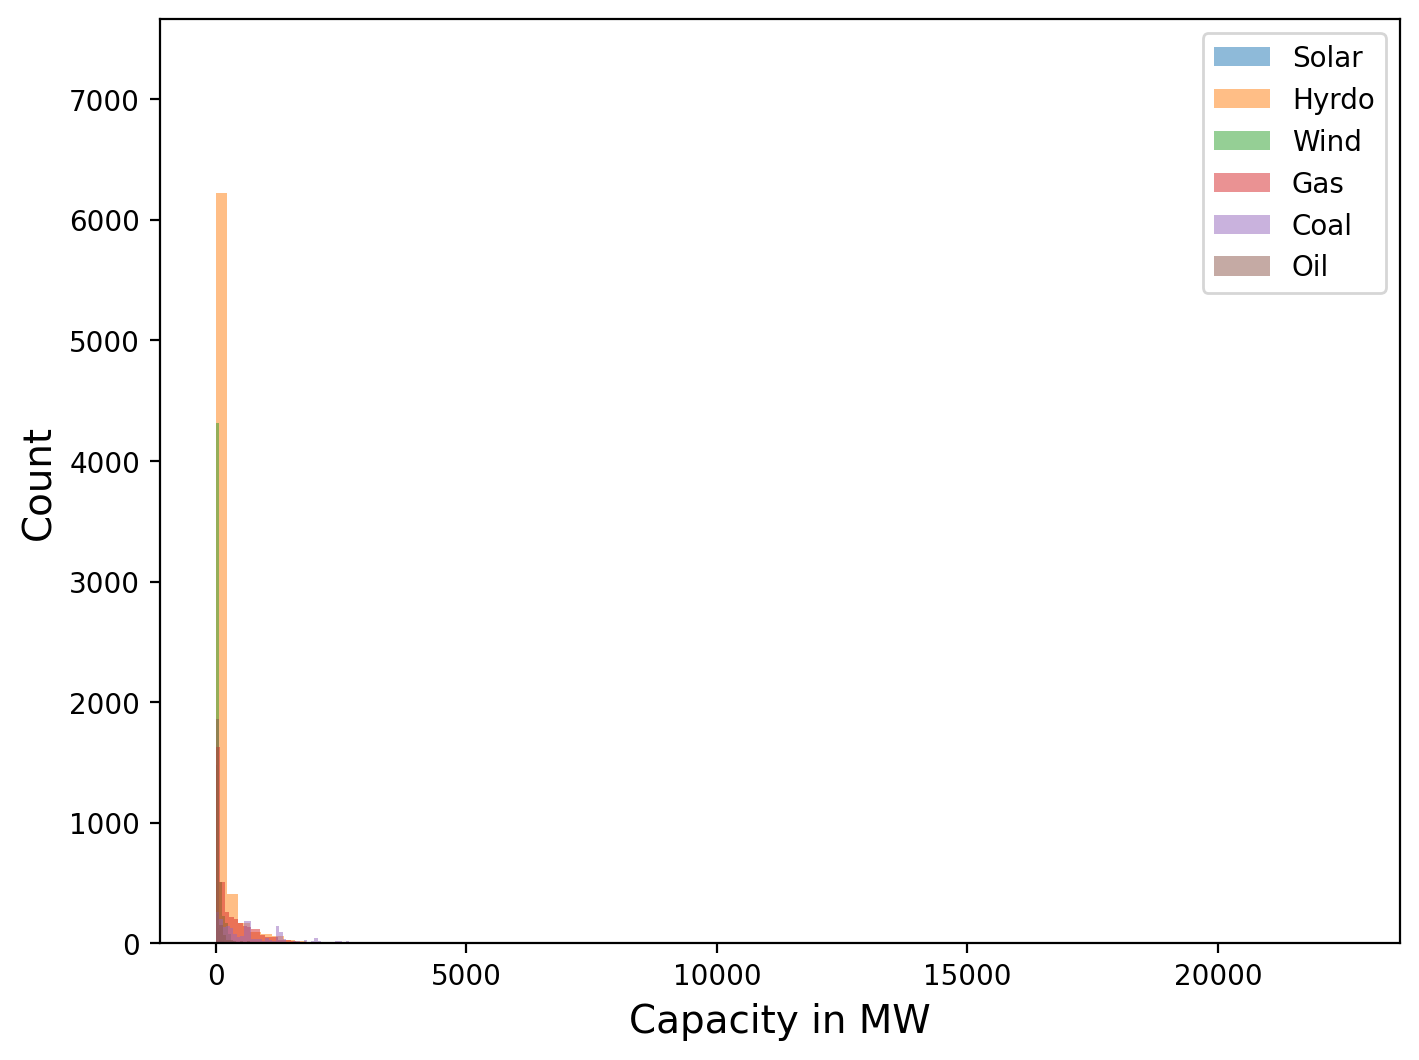

In [15]:
plt.figure(figsize=(8,6))
plt.hist(df.loc[df.loc[:, 'primary_fuel'] == 'Solar', ['capacity in MW']], bins=100, alpha=0.5, label="Solar")
plt.hist(df.loc[df.loc[:, 'primary_fuel'] == 'Hydro', ['capacity in MW']], bins=100, alpha=0.5, label="Hyrdo")
plt.hist(df.loc[df.loc[:, 'primary_fuel'] == 'Wind', ['capacity in MW']], bins=100, alpha=0.5, label="Wind")
plt.hist(df.loc[df.loc[:, 'primary_fuel'] == 'Gas', ['capacity in MW']], bins=100, alpha=0.5, label="Gas")
plt.hist(df.loc[df.loc[:, 'primary_fuel'] == 'Coal', ['capacity in MW']], bins=100, alpha=0.5, label="Coal")
plt.hist(df.loc[df.loc[:, 'primary_fuel'] == 'Oil', ['capacity in MW']], bins=100, alpha=0.5, label="Oil")
plt.xlabel(x_label_histograms, size=14)
plt.ylabel("Count", size=14)
plt.legend(loc='upper right')

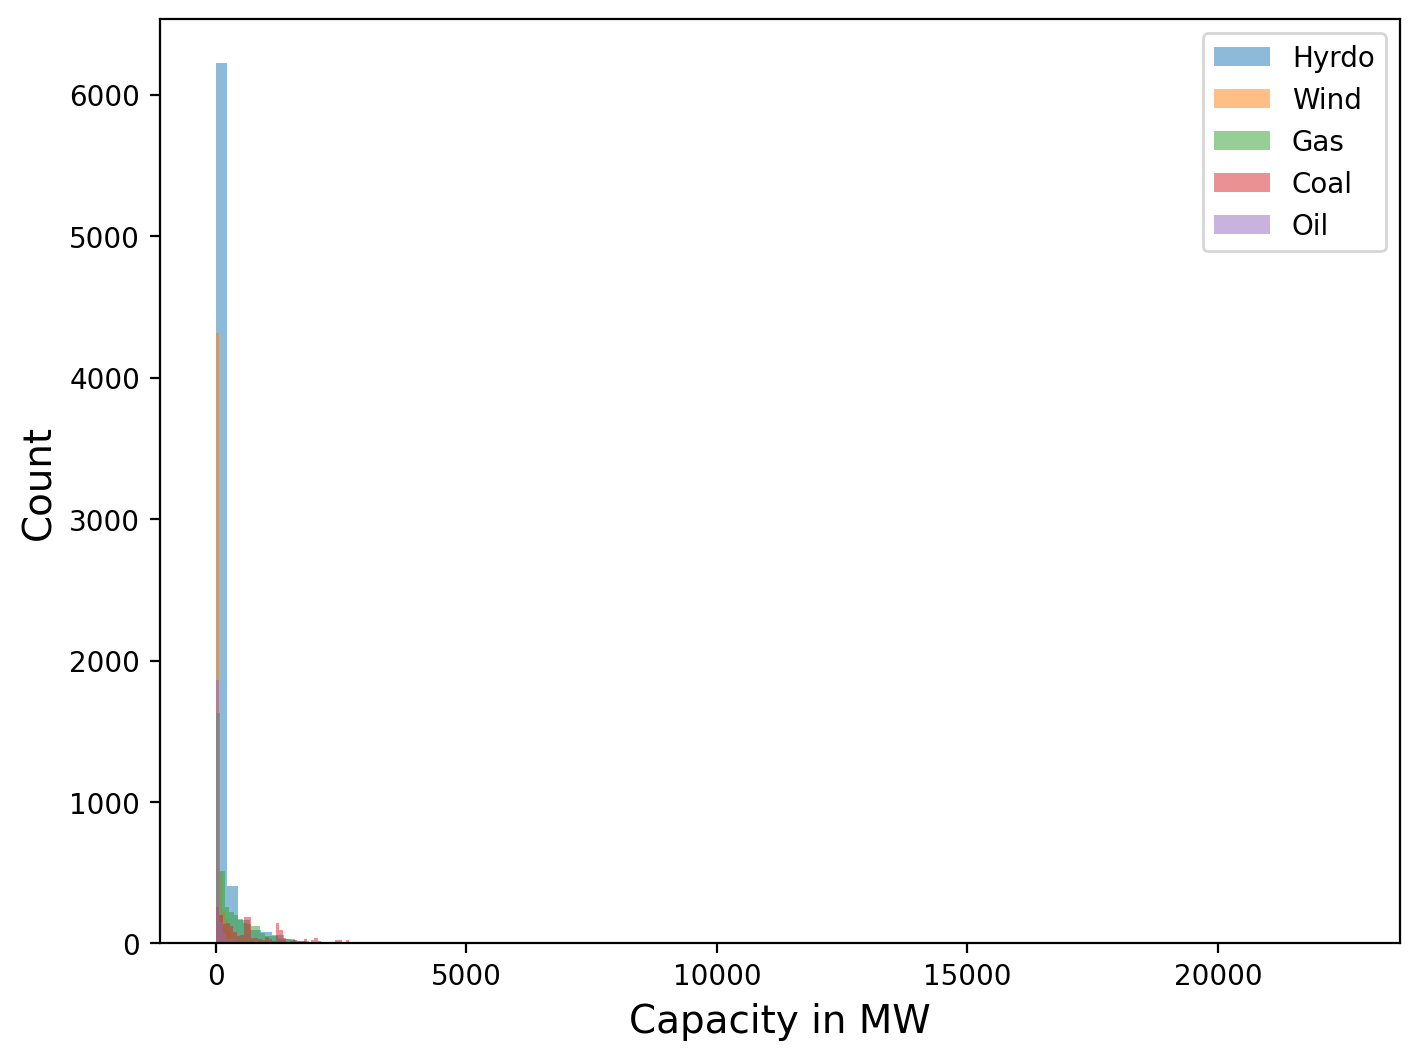

In [16]:
plt.figure(figsize=(8,6))
plt.hist(df.loc[df.loc[:, 'primary_fuel'] == 'Hydro', ['capacity in MW']], bins=100, alpha=0.5, label="Hyrdo")
plt.hist(df.loc[df.loc[:, 'primary_fuel'] == 'Wind', ['capacity in MW']], bins=100, alpha=0.5, label="Wind")
plt.hist(df.loc[df.loc[:, 'primary_fuel'] == 'Gas', ['capacity in MW']], bins=100, alpha=0.5, label="Gas")
plt.hist(df.loc[df.loc[:, 'primary_fuel'] == 'Coal', ['capacity in MW']], bins=100, alpha=0.5, label="Coal")
plt.hist(df.loc[df.loc[:, 'primary_fuel'] == 'Oil', ['capacity in MW']], bins=100, alpha=0.5, label="Oil")
plt.xlabel(x_label_histograms, size=14)
plt.ylabel("Count", size=14)
plt.legend(loc='upper right')

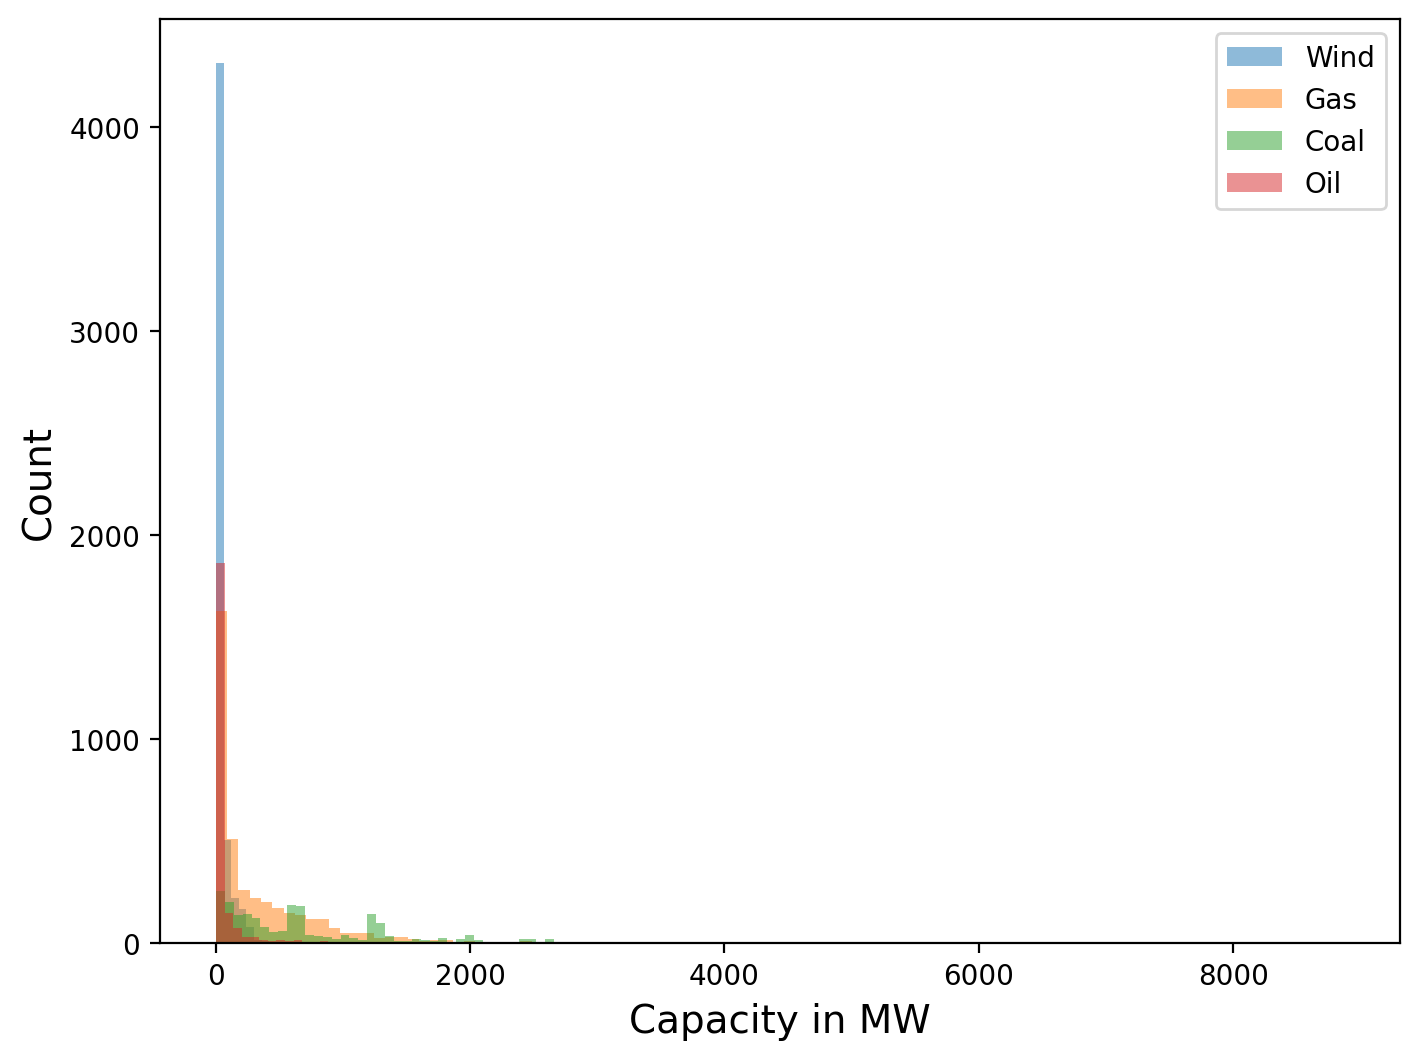

In [18]:
plt.figure(figsize=(8,6))
plt.hist(df.loc[df.loc[:, 'primary_fuel'] == 'Wind', ['capacity in MW']], bins=100, alpha=0.5, label="Wind")
plt.hist(df.loc[df.loc[:, 'primary_fuel'] == 'Gas', ['capacity in MW']], bins=100, alpha=0.5, label="Gas")
plt.hist(df.loc[df.loc[:, 'primary_fuel'] == 'Coal', ['capacity in MW']], bins=100, alpha=0.5, label="Coal")
plt.hist(df.loc[df.loc[:, 'primary_fuel'] == 'Oil', ['capacity in MW']], bins=100, alpha=0.5, label="Oil")
plt.xlabel(x_label_histograms, size=14)
plt.ylabel("Count", size=14)
plt.legend(loc='upper right')

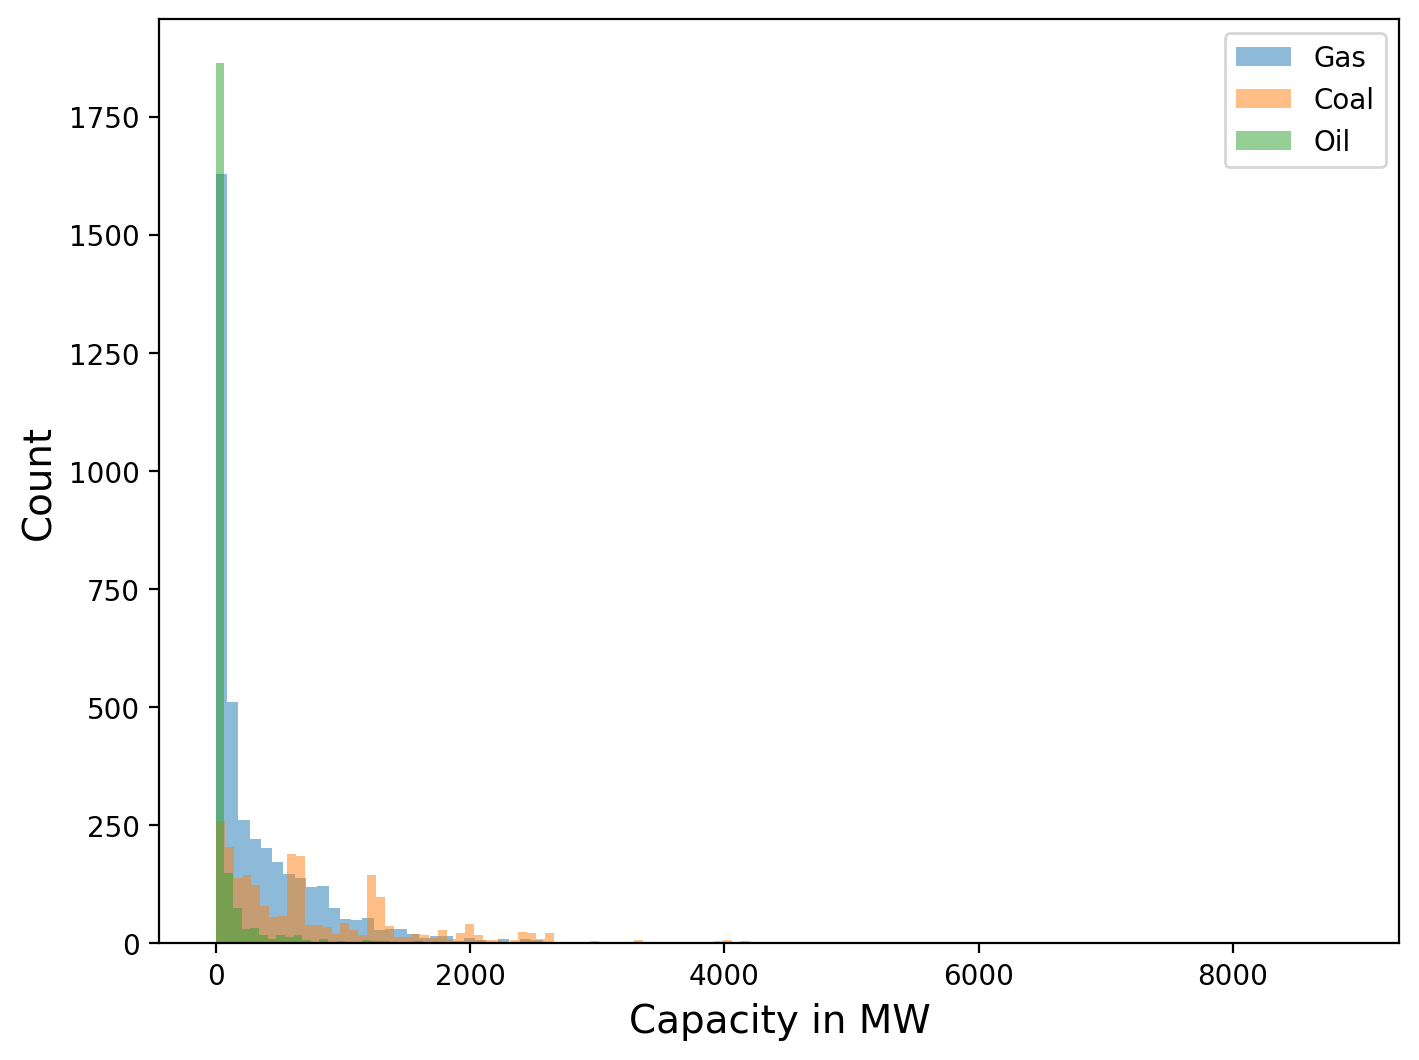

In [19]:
plt.figure(figsize=(8,6))
plt.hist(df.loc[df.loc[:, 'primary_fuel'] == 'Gas', ['capacity in MW']], bins=100, alpha=0.5, label="Gas")
plt.hist(df.loc[df.loc[:, 'primary_fuel'] == 'Coal', ['capacity in MW']], bins=100, alpha=0.5, label="Coal")
plt.hist(df.loc[df.loc[:, 'primary_fuel'] == 'Oil', ['capacity in MW']], bins=100, alpha=0.5, label="Oil")
plt.xlabel(x_label_histograms, size=14)
plt.ylabel("Count", size=14)
plt.legend(loc='upper right')

In [18]:
type_of_fuel = df_barplot.primary_fuel.values.tolist()

In [23]:
for i in type_of_fuel:
    print("Type: {}".format(i))
    print(df.loc[df.loc[:, 'primary_fuel'] == i, ['capacity in MW']].describe())
    print(" ")

Type: Solar
       capacity in MW
count    10665.000000
mean        17.657039
std         41.939412
min          1.000000
25%          2.600000
50%          5.800000
75%         18.000000
max       1021.000000
 
Type: Hydro
       capacity in MW
count     7156.000000
mean       147.171551
std        549.809328
min          1.000000
25%          5.395000
50%         20.000000
75%         93.600000
max      22500.000000
 
Type: Wind
       capacity in MW
count     5344.000000
mean        49.224126
std        106.138355
min          1.000000
25%         10.000000
50%         27.000000
75%         49.000000
max       6000.000000
 
Type: Gas
       capacity in MW
count     3998.000000
mean       373.449375
std        560.934146
min          1.000000
25%         28.425000
50%        147.500000
75%        532.066775
max       8865.000000
 
Type: Coal
       capacity in MW
count     2330.000000
mean       843.579828
std        888.187187
min          1.200000
25%        200.000000
50%        6

# Country stats

In [9]:
fuel_type = ['Solar', 'Gas']
countries_to_invest = ['Sweden', 'Singapore', 'Switzerland', 'Netherlands', 'Finland', 'United States of America']
df_clean = df['owner of plant'].dropna()
df_clean = df.loc[df['owner of plant'].notnull(), ]
df_clean = df_clean[df_clean['country_long'].isin(countries_to_invest)]
df_clean = df_clean[df_clean['primary_fuel'].isin(fuel_type)]
df_clean.shape

(5120, 15)

# Empresas

## Sweden

In [15]:
df_clean.loc[df_clean.loc[:, 'country_long'] == countries_to_invest[0], ['owner of plant']]

owner of plant
21204         Fortum

## Netherlands

At this point, there are only Gas plants left

In [29]:
df_clean.loc[df_clean.loc[:, 'country_long'] == countries_to_invest[3], ].primary_fuel.value_counts()

Gas    12
Name: primary_fuel, dtype: int64

In [40]:
df_clean.loc[df_clean.loc[:, 'country_long'] == countries_to_invest[3], ]['capacity in MW'].describe()

count      12.000000
mean      776.000000
std       634.140936
min       114.000000
25%       407.500000
50%       607.000000
75%       909.750000
max      2465.000000
Name: capacity in MW, dtype: float64

In [30]:
q4_gas_netherlands =  df_clean.loc[df_clean.loc[:, 'country_long'] == countries_to_invest[3], ]['capacity in MW'].describe().loc['75%']
q4_gas_netherlands

909.75

In [31]:
df_clean.loc[(df_clean.loc[:, 'country_long'] == countries_to_invest[3]) &
             (df_clean.loc[:, 'capacity in MW'] > q4_gas_netherlands), 
             ['owner of plant']]

owner of plant
17701     Electrabel
17705       GDF Suez
17729     Vattenfall

## Finland

In [33]:
df_clean.loc[df_clean.loc[:, 'country_long'] == countries_to_invest[4], ].primary_fuel.value_counts()

Gas    17
Name: primary_fuel, dtype: int64

In [41]:
 df_clean.loc[df_clean.loc[:, 'country_long'] == countries_to_invest[4], ]['capacity in MW'].describe()

count     17.000000
mean     113.182353
std      126.781417
min        2.700000
25%       16.500000
50%       72.000000
75%      163.000000
max      485.000000
Name: capacity in MW, dtype: float64

In [35]:
q4_gas_finland =  df_clean.loc[df_clean.loc[:, 'country_long'] == countries_to_invest[4], ]['capacity in MW'].describe().loc['75%']
q4_gas_finland

163.0

In [36]:
df_clean.loc[(df_clean.loc[:, 'country_long'] == countries_to_invest[4]) &
             (df_clean.loc[:, 'capacity in MW'] > q4_gas_finland), 
             ['owner of plant']]

owner of plant
10197                Vantaan Energia Oy
10206  Turun Seudun Energiantuotanto Oy
10208           Tampereen SÃ¤hkÃ¶laitos
10288                 Helsingin Energia

## United States of America

In [37]:
df_clean.loc[df_clean.loc[:, 'country_long'] == countries_to_invest[5], ].primary_fuel.value_counts()

Solar    3280
Gas      1810
Name: primary_fuel, dtype: int64

In [42]:
df_clean.loc[(df_clean.loc[:, 'primary_fuel'] == fuel_type[0] )
             &
             (df_clean.loc[:, 'country_long'] == countries_to_invest[5]), ]['capacity in MW'].describe()

count    3280.000000
mean       11.551540
std        31.127755
min         1.000000
25%         1.675000
50%         3.000000
75%         5.200000
max       585.900000
Name: capacity in MW, dtype: float64

In [43]:
df_clean.loc[(df_clean.loc[:, 'primary_fuel'] == fuel_type[1] )
             &
             (df_clean.loc[:, 'country_long'] == countries_to_invest[5]), ]['capacity in MW'].describe()

count    1810.000000
mean      301.567845
std       443.558982
min         1.000000
25%        14.100000
50%        91.800000
75%       466.900000
max      4263.000000
Name: capacity in MW, dtype: float64

In [46]:
q4_sup_solar_usa = (df_clean.loc[(df_clean.loc[:, 'primary_fuel'] == fuel_type[0] )
                        &
                     (df_clean.loc[:, 'country_long'] == countries_to_invest[5]), ]['capacity in MW'].describe().loc['75%']
                    +
                    df_clean.loc[(df_clean.loc[:, 'primary_fuel'] == fuel_type[0] )
                        &
                     (df_clean.loc[:, 'country_long'] == countries_to_invest[5]), ]['capacity in MW'].describe().loc['max']
                    )/2
q4_sup_solar_usa

295.55

In [45]:
q4_sup_gas_usa = (df_clean.loc[(df_clean.loc[:, 'primary_fuel'] == fuel_type[1] )
                        &
                     (df_clean.loc[:, 'country_long'] == countries_to_invest[5]), ]['capacity in MW'].describe().loc['75%']
                    +
                    df_clean.loc[(df_clean.loc[:, 'primary_fuel'] == fuel_type[1] )
                        &
                     (df_clean.loc[:, 'country_long'] == countries_to_invest[5]), ]['capacity in MW'].describe().loc['max']
                    )/2
q4_sup_gas_usa

2364.95

In [47]:
df_clean.loc[(df_clean.loc[:, 'country_long'] == countries_to_invest[5]) &
             (df_clean.loc[:, 'primary_fuel'] == fuel_type[0]) &
             (df_clean.loc[:, 'capacity in MW'] > q4_sup_solar_usa), 
             ['owner of plant']]

owner of plant
24873                      Agua Caliente Solar
27075  NextEra Energy Desert Sunlight 300  LLC
32706           Solar Star California XIX  LLC
32958                        Southern Power Co
33431                    Topaz Solar Farms LLC

In [49]:
df_clean.loc[(df_clean.loc[:, 'country_long'] == countries_to_invest[5]) &
             (df_clean.loc[:, 'primary_fuel'] == fuel_type[1]) &
             (df_clean.loc[:, 'capacity in MW'] > q4_sup_gas_usa), 
             ['owner of plant']]

owner of plant
25354                Alabama Power Co
26323          GenOn Chalk Point  LLC
26837        Duke Energy Florida  LLC
27765        Florida Power & Light Co
29029                Georgia Power Co
30014        Florida Power & Light Co
30530  Constellation Mystic Power LLC
30728           Entergy Louisiana LLC
31821           Helix Ravenswood  LLC
32335        Florida Power & Light Co
33642            Entergy Arkansas LLC
34117        Florida Power & Light Co